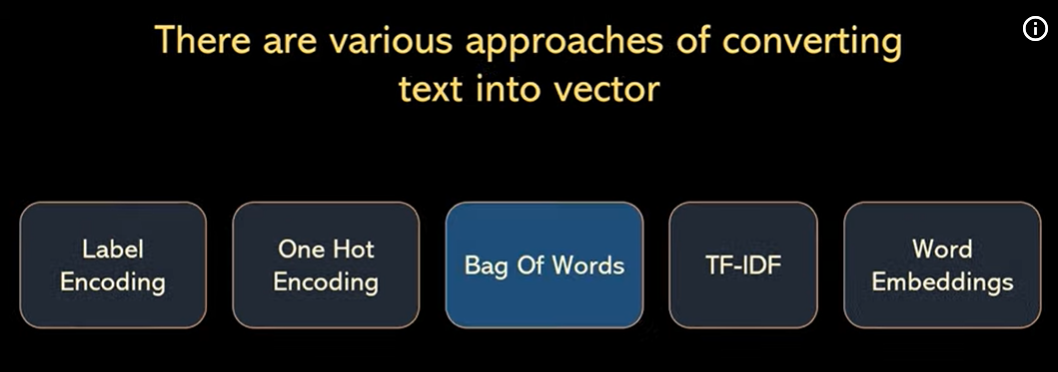

# Bag Of Words

In [1]:
# limitations of BOW's
# very long vocablory
# BOW mainly forms the sparse representation where most of the values are 0, which may consume to much memory and compute resources
# Doesnot capture meaning of words properly(when 2 words have same meaning but are counting as different words,just numeric count happening)

In [2]:
import pandas as pd
import numpy as np

In [3]:
df=pd.read_csv("spam_bag_of_words.csv")
df.head()

,Category,Message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [4]:
df.Category.value_counts()

Category
ham     4825
spam     747
Name: count, dtype: int64

In [5]:
 # def get_spam_number(x):
 #     if x=="spam":
 #         return 1
 #    return 0

In [6]:
df["spam"] = df['Category'].apply(lambda x: 1 if x=="spam" else 0)

In [7]:
df.shape

(5572, 3)

In [8]:
df.head()

,Category,Message,spam
0,ham,"Go until jurong point, crazy.. Available only ...",0
1,ham,Ok lar... Joking wif u oni...,0
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,1
3,ham,U dun say so early hor... U c already then say...,0
4,ham,"Nah I don't think he goes to usf, he lives aro...",0


### Train Test Split

In [9]:
from sklearn.model_selection import train_test_split
X_train,X_test, y_train, y_test =  train_test_split(
    df.Message,df.spam,test_size=0.2,
    stratify=df.spam,       # This preserves label proportions in train and test sets
    random_state=42         # Optional: for reproducibility
)

In [10]:
X_train.shape

(4457,)

In [11]:
X_test.shape

(1115,)

In [12]:
type(X_train)

pandas.core.series.Series

In [13]:
X_train[:4]

184                              He will, you guys close?
2171    CAN I PLEASE COME UP NOW IMIN TOWN.DONTMATTER ...
5422              Ok k..sry i knw 2 siva..tats y i askd..
4113                            I'll see, but prolly yeah
Name: Message, dtype: object

In [14]:
type(y_train)

pandas.core.series.Series

In [15]:
y_train[:4]

184     0
2171    0
5422    0
4113    0
Name: spam, dtype: int64

## Create BOW representation using CountVectorizer
 ### CountVectorization: It convert the collection of text documents to a matrix of token counts

In [16]:
type(X_train.values)

numpy.ndarray

In [17]:
from sklearn.feature_extraction.text import CountVectorizer
# CountVectorizer expect a input as 1D iterable (list/Series/array) of text documents
v=CountVectorizer()                                        #v is Instance of Class CountVectorizer
X_train_cv = v.fit_transform(X_train.values)               #It now generate BOW model for X_train 
X_train_cv                                                 #it is sparse representation/metric to view this we need to convert it into array

<Compressed Sparse Row sparse matrix of dtype 'int64'
	with 58884 stored elements and shape (4457, 7663)>

In [18]:
X_train_cv.toarray()[:2] #First two samples

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [19]:
X_train_cv.shape #(emails rows,unique_words) 
#each email is now a vector of size 7801

(4457, 7663)

In [20]:
v.get_feature_names_out()[1000:1030]

array(['antha', 'anthony', 'anti', 'antibiotic', 'any', 'anybody',
       'anymore', 'anyone', 'anyones', 'anythiing', 'anythin', 'anything',
       'anytime', 'anyway', 'anyways', 'anywhere', 'aom', 'apart',
       'apartment', 'apes', 'aphex', 'apnt', 'apo', 'apologetic',
       'apologise', 'apologize', 'app', 'apparently', 'appeal', 'appear'],
      dtype=object)

In [21]:
v.get_feature_names_out().shape #Thats my vocabluory

(7663,)

In [22]:
# dir(v)

In [23]:
#v.vocabulary_

In [24]:
X_train_np = X_train_cv.toarray()
X_train_np[:4]

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [25]:
X_train_np[0]

array([0, 0, 0, ..., 0, 0, 0])

In [26]:
np.where(X_train_np[0]!=0)

(array([1856, 3285, 3368, 7434, 7624]),)

In [27]:
X_train.index

Index([ 184, 2171, 5422, 4113, 4588, 1581, 3970, 2701, 2755, 1848,
       ...
       3289,  895, 3438, 4214, 2329, 1932, 5316, 2309, 1904,  762],
      dtype='int64', length=4457)

In [28]:
# v.vocabulary_

In [29]:
indx=v.vocabulary_.get("town")
print(indx)

6922


In [30]:
X_train[:4]

184                              He will, you guys close?
2171    CAN I PLEASE COME UP NOW IMIN TOWN.DONTMATTER ...
5422              Ok k..sry i knw 2 siva..tats y i askd..
4113                            I'll see, but prolly yeah
Name: Message, dtype: object

In [31]:
X_train[:4][4113]

"I'll see, but prolly yeah"

 ## Train the Naive Bayes Model

In [32]:
from sklearn.naive_bayes import MultinomialNB
model=MultinomialNB()

In [33]:
model.fit(X_train_np,y_train)

MultinomialNB()

In [34]:
X_test_cv = v.transform(X_test)
y_pred = model.predict(X_test_cv)
print(y_pred[:5])

[0 0 0 1 0]


## Evaluation report

In [35]:
from sklearn.metrics import classification_report #we use this bcz here dataset is imbalanced
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.99      1.00      0.99       966
           1       0.99      0.91      0.95       149

    accuracy                           0.99      1115
   macro avg       0.99      0.96      0.97      1115
weighted avg       0.99      0.99      0.99      1115



In [36]:
emails = [
    'Hey mohan, can we get together to watch footbal game tomorrow?',
    'Upto 20% discount on parking, exclusive offer just for you. Dont miss this reward!'
]

emails_count = v.transform(emails)
model.predict(emails_count)

array([0, 1])

## Pipeline 

In [37]:
from sklearn.pipeline import Pipeline
vnb = Pipeline([
     ("Vectorizer", CountVectorizer()),
     ("Multinomial",MultinomialNB())
])

In [38]:
vnb.fit(X_train,y_train)

Pipeline(steps=[('Vectorizer', CountVectorizer()),
                ('Multinomial', MultinomialNB())])

In [39]:
y_pred=vnb.predict(X_test)
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.99      1.00      0.99       966
           1       0.99      0.91      0.95       149

    accuracy                           0.99      1115
   macro avg       0.99      0.96      0.97      1115
weighted avg       0.99      0.99      0.99      1115

